# Working with Known JSON Schemas - Lab

## Introduction
In this lab, you'll practice working with JSON files whose schema you know beforehand.

## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Extract data using predefined JSON schemas
* Convert JSON to a pandas dataframe

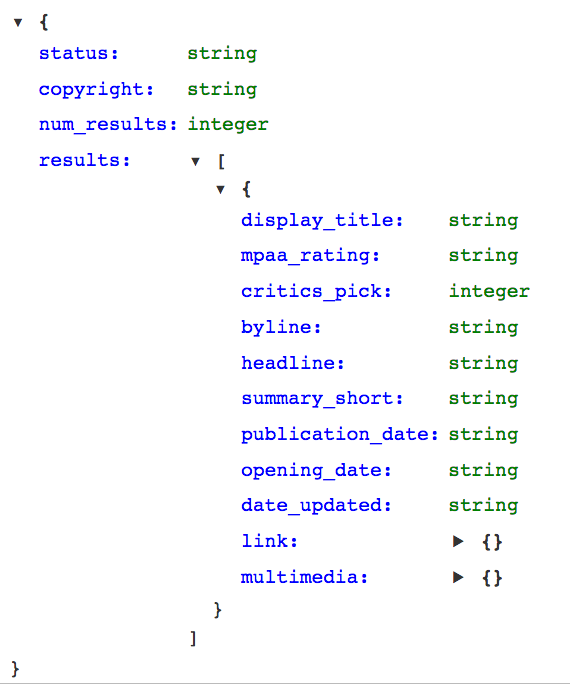## Reading a JSON Schema

Here's the JSON schema provided for a section of the NY Times API:
<img src="images/nytimes_movie_schema.png" width=500>

or a fully expanded view:

<img src="images/nytimes_movie_schema_detailed.png" width=500>

You can more about the documentation [here](https://developer.nytimes.com/docs/movie-reviews-api/1/routes/reviews/%7Btype%7D.json/get).



## Loading the JSON Data

Open the JSON file located at `ny_times_movies.json`, and use the `json` module to load the data into a variable called `data`.

In [13]:
# Your code here
import json
with open('ny_times_movies.json') as file:
    data = json.load(file)
print('Sucessful (Yay!)')

Sucessful (Yay!)


Run the code below to investigate its contents:

In [14]:
# Run this cell without changes
print("`data` has type", type(data))
print("The keys are", list(data.keys()))

`data` has type <class 'dict'>
The keys are ['status', 'copyright', 'has_more', 'num_results', 'results']


## Loading Results

Create a variable `results` that contains the value associated with the `'results'` key.

In [15]:
# Your code here
results = data.get('results')
# results[:4]

Below we display this variable as a table using pandas:

In [16]:
# Run this cell without changes
import pandas as pd
df = pd.DataFrame(results)
df

,display_title,mpaa_rating,critics_pick,byline,headline,summary_short,publication_date,opening_date,date_updated,link,multimedia
0,Can You Ever Forgive Me,R,1,A.O. SCOTT,Review: Melissa McCarthy Is Criminally Good in...,Marielle Heller directs a true story of litera...,2018-10-16,2018-10-19,2018-10-17 02:44:23,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
1,Charm City,,1,BEN KENIGSBERG,Review: ‘Charm City’ Vividly Captures the Stre...,Marilyn Ness’s documentary is dedicated to the...,2018-10-16,2018-04-22,2018-10-16 11:04:03,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
2,Horn from the Heart: The Paul Butterfield Story,,1,GLENN KENNY,Review: Paul Butterfield’s Story Is Told in ‘H...,A documentary explores the life of the blues m...,2018-10-16,2018-10-19,2018-10-16 11:04:04,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
3,The Price of Everything,,0,A.O. SCOTT,Review: ‘The Price of Everything’ Asks $56 Bil...,This documentary examines the global art marke...,2018-10-16,2018-10-19,2018-10-16 16:08:03,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
4,Impulso,,0,BEN KENIGSBERG,Review: ‘Impulso’ Goes Backstage With a Flamen...,"This documentary follows Rocío Molina, a cutti...",2018-10-16,None,2018-10-16 11:04:03,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
5,Watergate,,1,A.O. SCOTT,Review: ‘Watergate’ Shocks Anew With Its True ...,Charles Ferguson delivers a comprehensive docu...,2018-10-11,2018-10-12,2018-10-17 02:44:21,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
6,Barbara,,1,GLENN KENNY,"Review: In ‘Barbara,’ a Fictional Biopic of a ...",It’s a film of scenes rather than of one unifi...,2018-10-11,None,2018-10-17 02:44:21,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
7,Over the Limit,,1,JEANNETTE CATSOULIS,Review: A Russian Gymnast Goes ‘Over the Limit’,Margarita Mamun endures injury and abuse in Ma...,2018-10-11,2018-10-05,2018-10-17 02:44:20,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
8,The Kindergarten Teacher,R,1,JEANNETTE CATSOULIS,Review: The Disturbing Obsession of ‘The Kinde...,Maggie Gyllenhaal is riveting as a dissatisfie...,2018-10-11,2018-10-12,2018-10-17 02:44:19,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
9,Classical Period,,1,BEN KENIGSBERG,"Review: In ‘Classical Period,’ a Deep Dive — R...",This highly original feature is technically in...,2018-10-11,None,2018-10-17 02:44:18,"{'type': 'article', 'url': 'http://www.nytimes...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."


## Data Analysis

Now that you have a general sense of the data, answer some questions about it.

### How many results are in the file?

The metadata says this:

In [17]:
# Run this cell without changes
data['num_results']

20

Double-check that by looking at `results`. Does it line up?

In [18]:
# Your code here
len(results)

20

In [19]:
"""
Your written answer here
"""
print(f"""The number of results matches the number of 
entries on 'num_results' i.e. {data['num_results']} = {len(results)}.""")

The number of results matches the number of 
entries on 'num_results' i.e. 20 = 20.


### How many unique critics are there?

A critic's name can be identified using the `'byline'` key. Assign your answer to the variable `unique_critics`.

In [20]:
# Your code here
# df.columns # finding out the list of column names
# df.byline # finding out what critics we have

list_of_unique_critics = list(set(list(df.byline)))
list_of_unique_critics.sort() # sorted alphabetically
unique_critics = len(list_of_unique_critics)

This code checks your answer.

In [21]:
# Run this cell without changes
assert unique_critics == 7

## Flattening Data

Create a list `review_urls` that contains the URL for each review. This can be found using the `'url'` key nested under `'link'`.

In [22]:
# Your code here (create more cells as needed)
# df.link[0].get('url')
# for index in range(len(df.link)):
#     print(df.link[index].get('url'))

review_urls = [df.link[index].get('url') for index in range(len(df.link))]
review_urls[2:4]

['http://www.nytimes.com/2018/10/16/movies/horn-from-the-heart-review-paul-butterfield.html',
 'http://www.nytimes.com/2018/10/16/movies/the-price-of-everything-review-documentary.html']

The following code will check your answer:

In [23]:
# Run this cell without changes

# review_urls should be a list
assert type(review_urls) == list

# The length should be 20, same as the length of reviews
assert len(review_urls) == 20

# The data type contained should be string
assert type(review_urls[0]) == str and type(review_urls[-1]) == str

# Spot checking a specific value
assert review_urls[6] == 'http://www.nytimes.com/2018/10/11/movies/barbara-review.html'

## Summary
In this lab you practiced extracting and transforming data from JSON files with known schemas.